In [1]:
import requests 
import pandas as pd
import seaborn as sns
apiKey = '87983fbe976988a9e22330ebf030a1ae'
url = 'https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&page={0}'
req = requests.get(url)
json = req.json()

In [2]:
def requestAllRevs2():
    ids2=[]
    pageNum = 1
    while True:
        r = requests.get(f"https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&sort_by=revene.desc&page={pageNum}")
        pageNum += 1
        rJson = r.json()
        if not r.ok or pageNum >= 10:
            return ids2
        for i in rJson['results']:
            ids2.append(i['id'])
ids2 = requestAllRevs2()

In [3]:
def getMovieDetails2():
    movieDetails = []
    for i in ids2:
        movieDetail = {}
        r = requests.get(f"https://api.themoviedb.org/3/movie/{i}?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US")
        rJson = r.json()
        movieDetail['title'] = rJson['title']
        movieDetails.append(movieDetail)
        movieDetail['money'] = rJson['revenue']
        movieDetails.append(movieDetail)
        #print(movieDetail1)
    return movieDetails
titles2 = getMovieDetails2()

In [4]:
df = pd.DataFrame(titles2)

In [5]:
top = df.sort_values(by='money', ascending=False)

In [6]:
top20 = top[:20]

In [7]:
top20

,title,money
181,Avengers: Endgame,2797800564
180,Avengers: Endgame,2797800564
193,Avengers: Infinity War,2046239637
192,Avengers: Infinity War,2046239637
124,Top Gun: Maverick,1482656000
125,Top Gun: Maverick,1482656000
38,The Lord of the Rings: The Return of the King,1118888979
39,The Lord of the Rings: The Return of the King,1118888979
308,Joker,1074251311
309,Joker,1074251311


<AxesSubplot:xlabel='money', ylabel='title'>

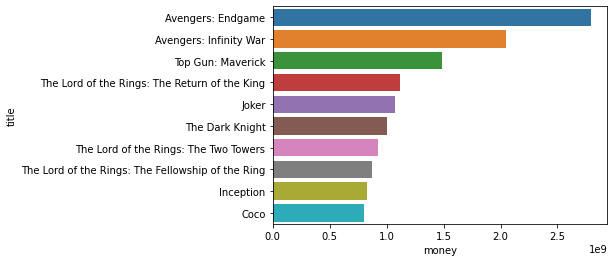

In [8]:
sns.barplot(data= top20,x = 'money', y = 'title', )

In [9]:
directors = ["Joe Russo", "Joe Russo", "Joe Russo", "Joe Russo","Joseph Kosinski","Joseph Kosinski","Peter Jackson","Peter Jackson","Todd Philups","Todd Philups", "Christopher Nolan","Christopher Nolan","Peter Jackson","Peter Jackson","Peter Jackson","Peter Jackson","Christopher","Christopher","adrian molina","adrian molina"]
top20.insert(1,"Directors",directors)

In [10]:
top20

,title,Directors,money
181,Avengers: Endgame,Joe Russo,2797800564
180,Avengers: Endgame,Joe Russo,2797800564
193,Avengers: Infinity War,Joe Russo,2046239637
192,Avengers: Infinity War,Joe Russo,2046239637
124,Top Gun: Maverick,Joseph Kosinski,1482656000
125,Top Gun: Maverick,Joseph Kosinski,1482656000
38,The Lord of the Rings: The Return of the King,Peter Jackson,1118888979
39,The Lord of the Rings: The Return of the King,Peter Jackson,1118888979
308,Joker,Todd Philups,1074251311
309,Joker,Todd Philups,1074251311


In [14]:
top10 = top20.drop_duplicates()

In [19]:
top10['combine'] = top10['title'] + top10['Directors']

C:\Users\grogers3\AppData\Local\Temp\ipykernel_14228\4211066710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['combine'] = top10['title'] + top10['Directors']


In [20]:
top10

,title,Directors,money,combine
181,Avengers: Endgame,Joe Russo,2797800564,Avengers: EndgameJoe Russo
193,Avengers: Infinity War,Joe Russo,2046239637,Avengers: Infinity WarJoe Russo
124,Top Gun: Maverick,Joseph Kosinski,1482656000,Top Gun: MaverickJoseph Kosinski
38,The Lord of the Rings: The Return of the King,Peter Jackson,1118888979,The Lord of the Rings: The Return of the KingP...
308,Joker,Todd Philups,1074251311,JokerTodd Philups
27,The Dark Knight,Christopher Nolan,1004558444,The Dark KnightChristopher Nolan
100,The Lord of the Rings: The Two Towers,Peter Jackson,926287400,The Lord of the Rings: The Two TowersPeter Jac...
84,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,871368364,The Lord of the Rings: The Fellowship of the R...
112,Inception,Christopher,825532764,InceptionChristopher
244,Coco,adrian molina,800526015,Cocoadrian molina


<AxesSubplot:xlabel='money', ylabel='combine'>

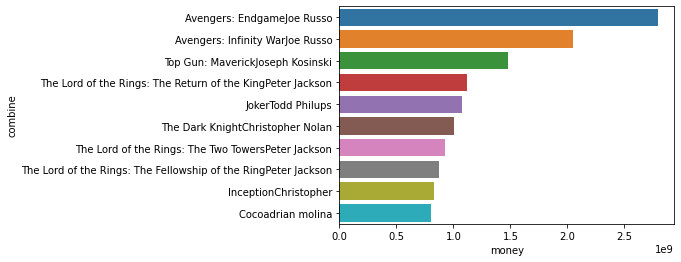

In [21]:
sns.barplot(data=top10,x='money',y='combine')

In [51]:
def getMovieDetails3():
    movieDetails = []
    for i in ids2:
        movieDetail = {}
        r = requests.get(f"https://api.themoviedb.org/3/movie/{i}?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US")
        rJson = r.json()
        movieDetail['gene'] = rJson['genres'][0]['name']
        movieDetails.append(movieDetail)
        movieDetail['money'] = rJson['revenue']
        movieDetails.append(movieDetail)
        #print(movieDetail)
    return movieDetails
genrea = getMovieDetails3()

In [52]:
df3 = pd.DataFrame(genrea)

<AxesSubplot:xlabel='money', ylabel='gene'>

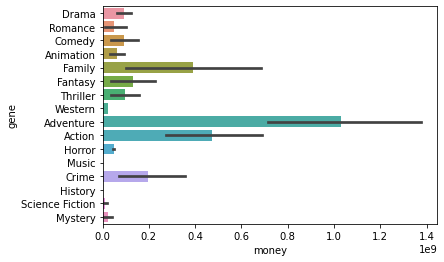

In [54]:
sns.barplot(data=df3, x = 'money',y = 'gene')